# RQ4: Replace Tokenizer

- Model was trained and evaluated
- Compare with RQ1
- Find out how long training took

In [10]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from matplotlib import rcParams

rcParams.update({'font.size': 14})

value_scores = {
    "attr_ids": {
        "t_score": [0.96],
        "v_score": [0.54]
    },
    "num_ids": {
        "t_score": [0.72],
        "v_score": [0.59]
    },
    "name_ids": {
        "t_score": [0.9],
        "v_score": [0.64]
    },
    "param_ids": {
        "t_score": [0.89],
        "v_score": [0.6]
    },
    "string_ids": {
        "t_score": [0.81],
        "v_score": [0.32]
    }
}
type_scores = {
    "call_ids": [0.78],
    "assign_ids": [0.69],
    "return_ids": [0.37],
    "list_ids": [0.37],
    "dict_ids": [0.003],
    "raise_ids": [0.36]
}

TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

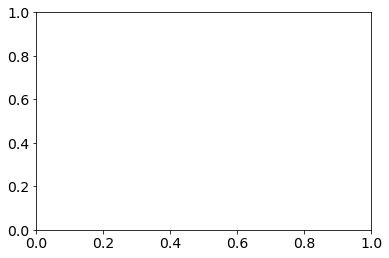

In [11]:
means = {
    "attr_ids": [],
    "num_ids": [],
    "name_ids": [],
    "param_ids": [],
    "string_ids": []
}
for key, value in value_scores.items():
    means[key].append((value["t_score"][0] + value["v_score"][0])/2)

width = 0.35
labels = ["attr_ids", 
          "num_ids", 
          "name_ids", 
          "param_ids", 
          "string_ids", 
          "call_ids", 
          "assign_ids", 
          "return_ids", 
          "list_ids", 
          "dict_ids", 
          "raise_ids"]
x = np.arange(len(labels))
fig, ax = plt.subplots()
r1 = ax.bar(x - width/2, [t[0] for t in type_scores])